**Mall Customers Clustering Analysis**

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# for basic mathematics operation 
import numpy as np

# for dataframe manipulations
import pandas as pd

# for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for data analysis
import dabl

**Reading the Dataset**

In [2]:
# importing the dataset
data = pd.read_csv('Mall_Customers.csv')

## Examining Data

In [3]:
# lets check the shape of the dataset
print("Shape of the dataset :", data.shape)

Shape of the dataset : (200, 5)


In [4]:
# lets check the head of the data
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# lets check the tail of the data
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
# lets check sample of the data
data.sample(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
79,80,Female,49,54,42
36,37,Female,42,34,17
5,6,Female,22,17,76


## Descriptive Statistics

In [7]:
# describing the data
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
# describing the categorical data
data.describe(include = 'object')

,Gender
count,200
unique,2
top,Female
freq,112


In [9]:
# checking if there is any NULL data
data.isnull().any().any()

False

## Clustering Analysis

In [10]:
# we want to perform clusters of Customers who share similar behaviour for that lets select the columns
# Spending score, and Annual Income

# lets import the warnings library so that we can avoid warnings
import warnings
warnings.filterwarnings('ignore')

# Lets select the Spending score, and Annual Income Columns from the Data
x = data.loc[:, ['Annual Income (k$)','Spending Score (1-100)']].values

# let's check the shape of x
print(x.shape)

(200, 2)


In [11]:
# lets also check the data, which we are going to use for the clustering analysis
x_data  = pd.DataFrame(x)
x_data.head()
# where o->Spending Score, and 1->Annual Income

,0,1
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Kmeans Algorithm

**The Elbow Method to find the No. of Optimal Clusters**

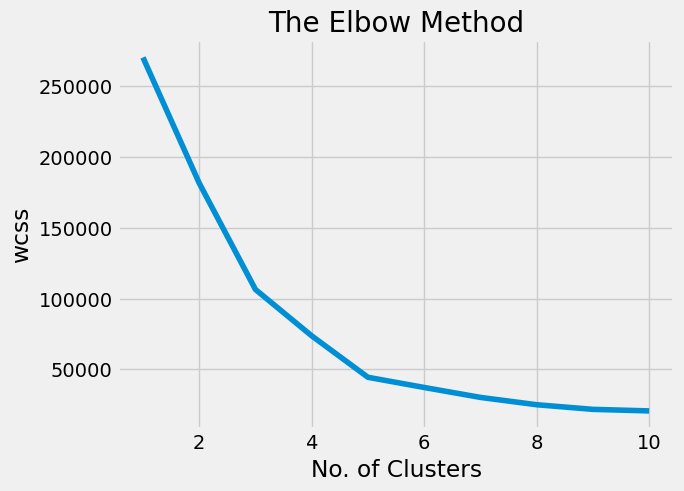

In [12]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

**Visualizaing the Clusters**

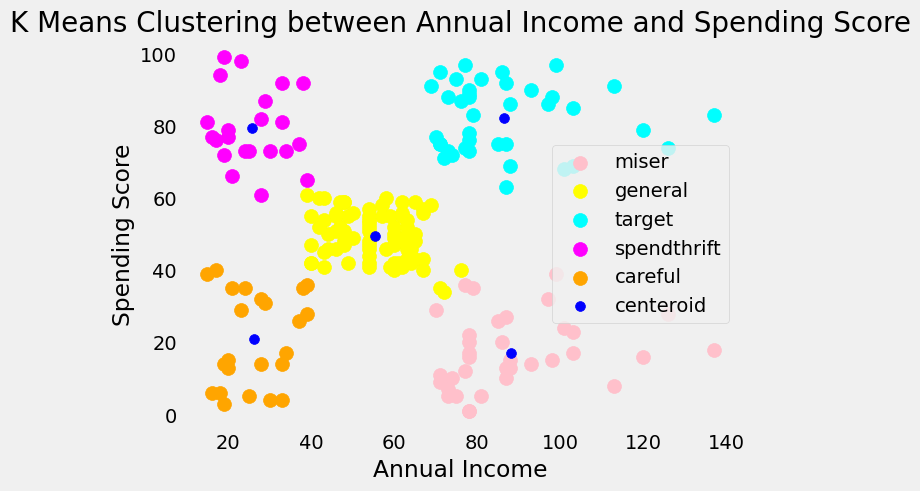

In [13]:
# lets visualize these clusters

plt.style.use('fivethirtyeight')

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x=x[y_means == 0, 0], y=x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x=x[y_means == 1, 0], y=x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x=x[y_means == 2, 0], y=x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x=x[y_means == 3, 0], y=x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x=x[y_means == 4, 0], y=x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(x=km.cluster_centers_[:,0], y=km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

## Silhouette Score and Silhouette Visualizer

In [14]:
from sklearn.metrics import silhouette_score

score = silhouette_score(x, km.labels_, metric='euclidean')
print('Silhouette Score: %.3f'%score)

Silhouette Score: 0.554


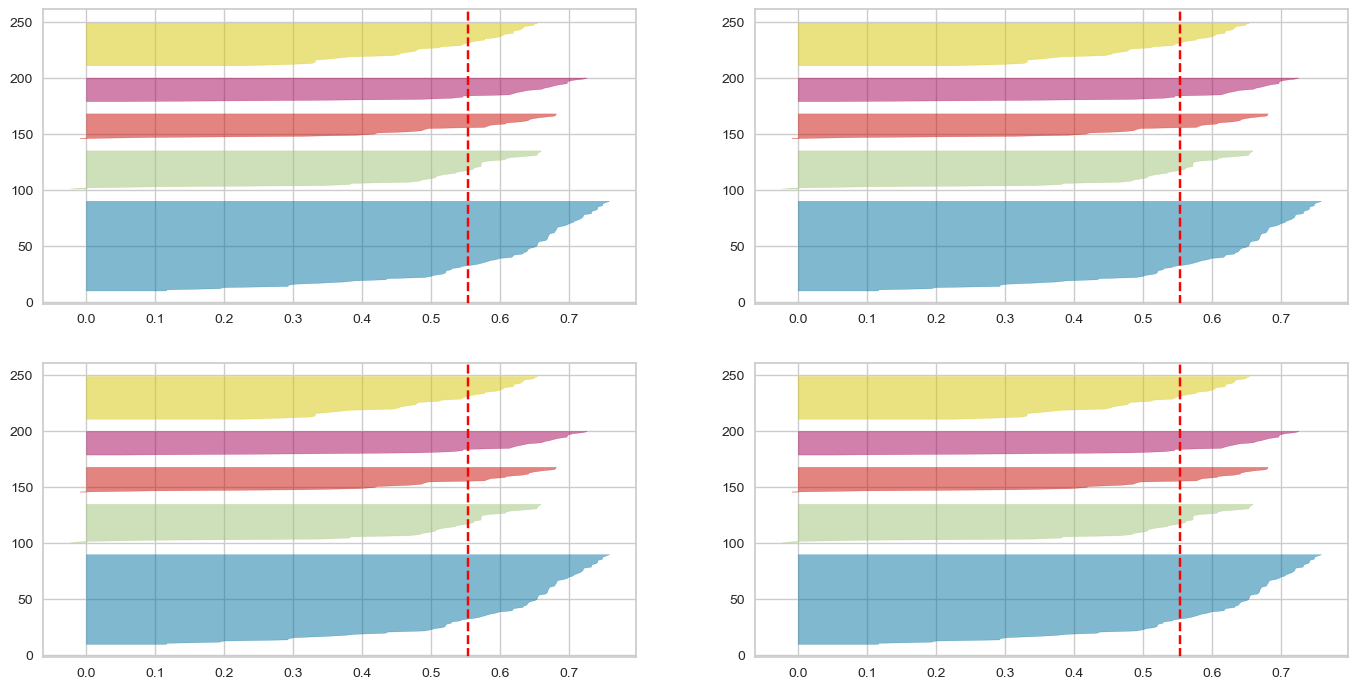

In [15]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2,2, figsize=(15,8))
for i in [2,3,4,5]:
    km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 42)
    q,mod = divmod(i,2)
    
    visualizer = SilhouetteVisualizer(km,colors='yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(x)

## Hierarichal Clustering

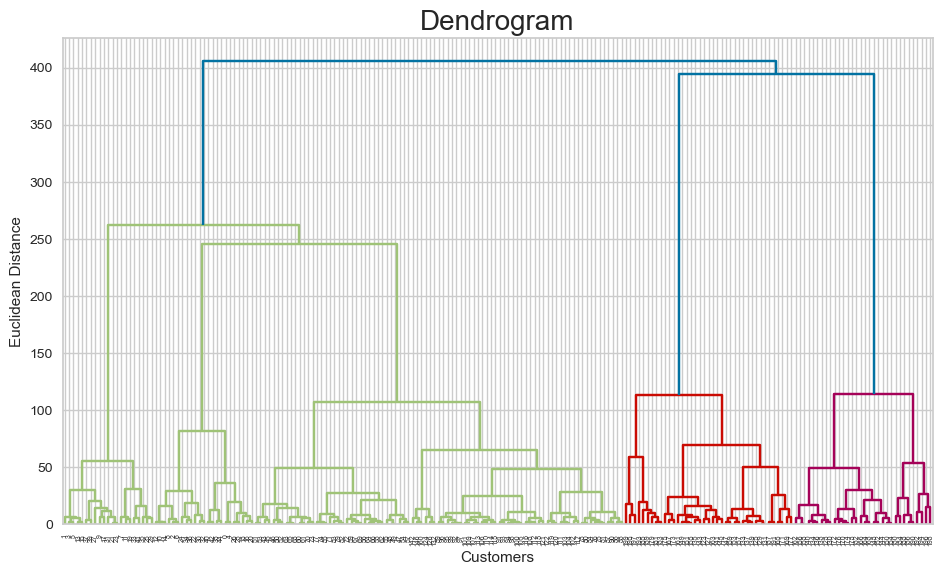

In [16]:
import scipy.cluster.hierarchy as sch

plt.rcParams['figure.figsize'] = (10,6)

dendrogram = sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram', fontsize=20)
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

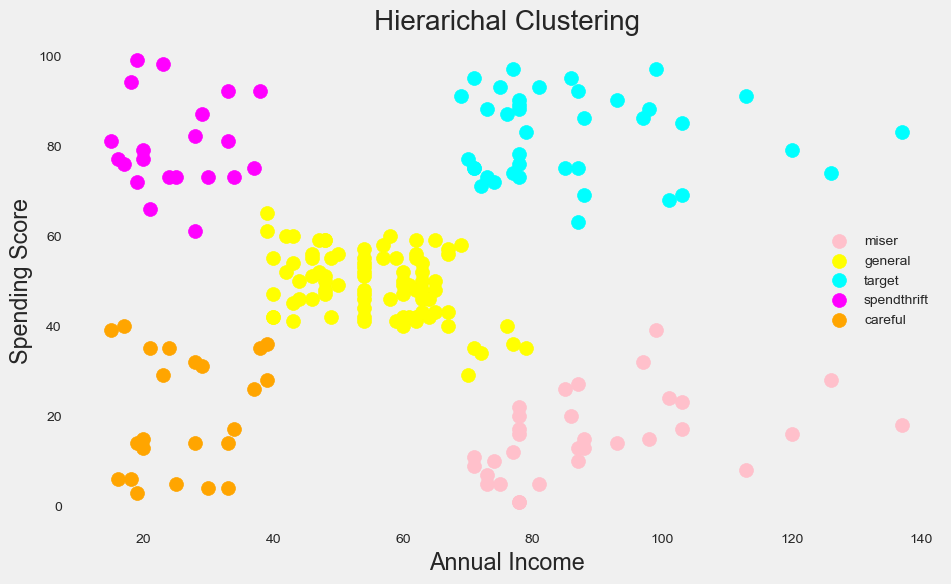

In [18]:
plt.style.use('fivethirtyeight')

plt.scatter(x=x[y_hc == 0, 0], y=x[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x=x[y_hc == 1, 0], y=x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x=x[y_hc == 2, 0], y=x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x=x[y_hc == 3, 0], y=x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x=x[y_hc == 4, 0], y=x[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')

plt.title('Hierarichal Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

## DBSCAN Clustering

In [19]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

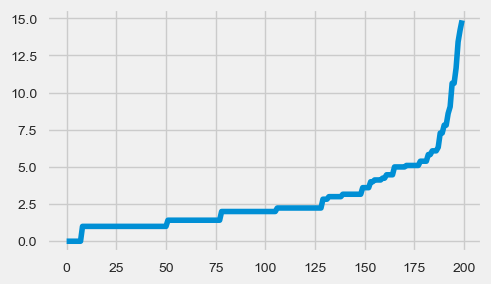

In [20]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.rcParams['figure.figsize']=(5,3)
plt.plot(distances)
plt.show()

In [21]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=8, min_samples=4)
clusters = dbscan.fit_predict(x)

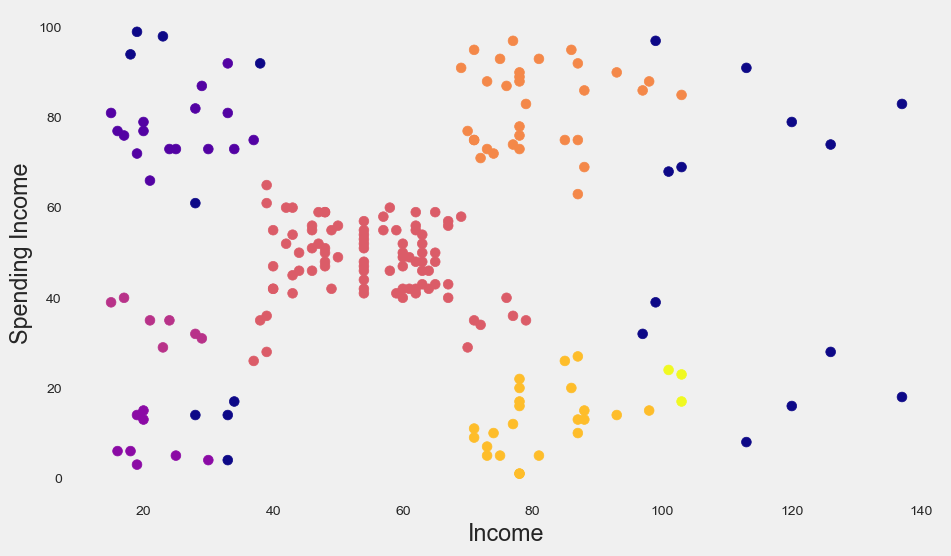

In [22]:
plt.style.use('fivethirtyeight')

plt.rcParams['figure.figsize'] = (10,6)
plt.scatter(x[:,0], x[:,1], c=clusters, cmap='plasma')
plt.xlabel('Income')
plt.ylabel('Spending Income')
plt.grid()
plt.show()

# Clustering between Age and Spending Score

In [23]:
X = data.loc[:, ['Age','Spending Score (1-100)']].values

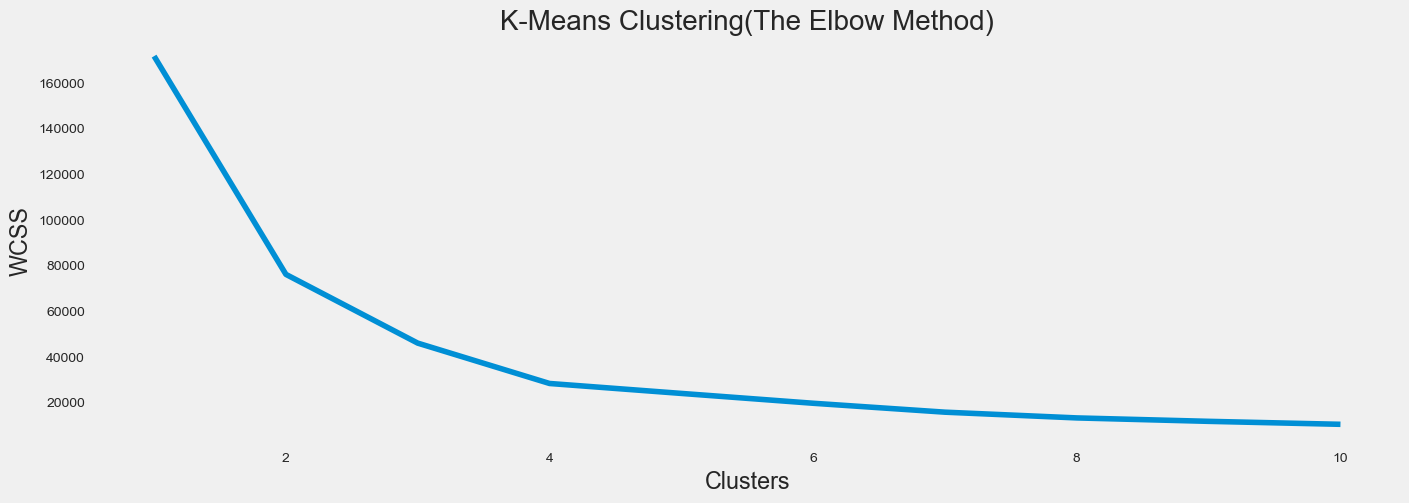

In [24]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

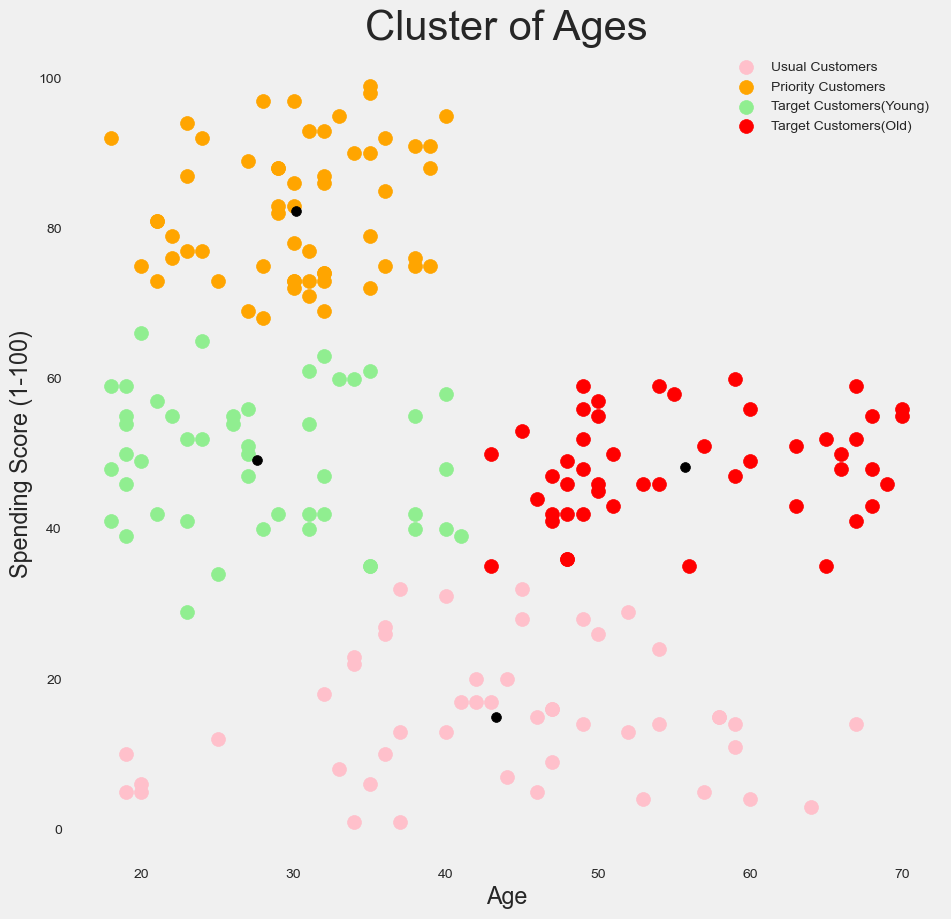

In [25]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(X)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(X[ymeans == 0, 0], X[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(X[ymeans == 1, 0], X[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(X[ymeans == 2, 0], X[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(X[ymeans == 3, 0], X[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()